In [31]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

selector = 'approximate = 1 & sample = 0 & eps = 0.05 & tau = 1. & phi = .4'
path = '/home/jakob/Project_Divestment/PyDivestment/output_data/test_output/P3o1/micro/'
#path = '/home/jakob/Project_Divestment/PyDivestment/output_data/P3/micro/'
data = []
measures = ['mean', 'std']

for m in measures:
    with pd.HDFStore(path + f'{m}.h5') as store:
        data.append(store.select('dat', selector))
for d in data:
    d.index = d.index.droplevel('eps').droplevel('tau').droplevel('test').droplevel('sample').droplevel('approximate').droplevel('phi')
    d.columns = [f'${var}$' for var in d.columns]
    tvals = d.index.values
    print(tvals)
    t0 = tvals[0] + 80
    new_times = {t: t-t0 for t in tvals}
    d.rename(mapper=new_times,
             axis='index',
             level='tstep',
             inplace=True)
    
def plotfunc(variables, colors, data, ax):
    lns = []
    for i, var in enumerate(variables):
        
        ln = ax.plot(data[0].index.values, data[0][var].values, color=colors[i], label=var)[0]
        lns.append(ln)
        upper_limit = np.transpose(data[0][[var]].values \
                                   + data[1][[var]].values)[0]
        lower_limit = np.transpose(data[0][[var]].values \
                                   - data[1][[var]].values)[0]
        ax.fill_between(data[0].index.values,
                                 upper_limit, lower_limit,
                                 color='k',
                                 alpha=0.05)
        ax.plot(data[0].index.values,
                                 upper_limit,
                                 color=colors[i],
                                 alpha=0.2)
        ax.plot(data[0].index.values,
                                 lower_limit,
                                 color=colors[i],
                                 alpha=0.2)
        ax.set_xlim([0, 300])
    print(lns)
    return lns

[   0.     4.5    9.    13.5   18.    22.5   27.    31.5   36.    40.5
   45.    49.5   54.    58.5   63.    67.5   72.    76.5   81.    85.5
   90.    94.5   99.   103.5  108.   112.5  117.   121.5  126.   130.5
  135.   139.5  144.   148.5  153.   157.5  162.   166.5  171.   175.5
  180.   184.5  189.   193.5  198.   202.5  207.   211.5  216.   220.5
  225.   229.5  234.   238.5  243.   247.5  252.   256.5  261.   265.5
  270.   274.5  279.   283.5  288.   292.5  297.   301.5  306.   310.5
  315.   319.5  324.   328.5  333.   337.5  342.   346.5  351.   355.5
  360.   364.5  369.   373.5  378.   382.5  387.   391.5  396.   400.5
  405.   409.5  414.   418.5  423.   427.5  432.   436.5  441.   445.5
  450.   454.5  459.   463.5  468.   472.5  477.   481.5  486.   490.5
  495.   499.5  504.   508.5  513.   517.5  522.   526.5  531.   535.5
  540.   544.5  549.   553.5  558.   562.5  567.   571.5  576.   580.5
  585.   589.5  594.   598.5  603.   607.5  612.   616.5  621.   625.5
  630.

[<matplotlib.lines.Line2D object at 0x7f4dce904048>, <matplotlib.lines.Line2D object at 0x7f4dc8cc8828>]
[<matplotlib.lines.Line2D object at 0x7f4dcea90080>, <matplotlib.lines.Line2D object at 0x7f4dc93032e8>]


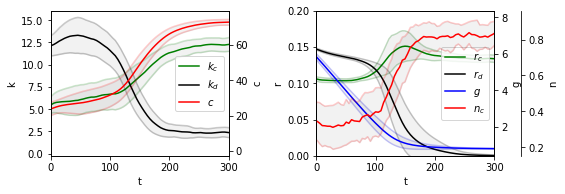

In [32]:
colors = ['g', 'k']
variables = ['$k_c$', '$k_d$']

fig = plt.figure(figsize=(8, 2.8))
ax = fig.add_subplot(121)

lns1 = plotfunc(variables, colors, data, ax)

axb = ax.twinx()

lns2 = plotfunc(['$c$'], ['r'], data, axb)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='center right')

ax2 = fig.add_subplot(122)

lns3 = plotfunc(variables=['$r_c$', '$r_d$'], 
                colors=['g', 'k'], data=data, ax=ax2)
ax2.set_ylim([0., 0.2])

ax2b = ax2.twinx()

lns4 = plotfunc(variables=['$g$'],
                colors=['b'], data=data, ax=ax2b)

ax2c = ax2.twinx()
ax2c.spines["right"].set_position(("axes", 1.15))

lns5 = plotfunc(variables=['$n_c$'],
                colors=['r'], data=data, ax=ax2c)

lns = lns3+lns4+lns5
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='center right')

ax.set_ylabel('k')
axb.set_ylabel('c')
ax2.set_ylabel('r')
ax2b.set_ylabel('g')
ax2c.set_ylabel('n')
ax.set_xlabel('t')
ax2.set_xlabel('t')


plt.tight_layout()
fig.savefig('example_trajectory.pdf')

[<matplotlib.lines.Line2D object at 0x7f4dc8358828>, <matplotlib.lines.Line2D object at 0x7f4dc8485c18>]
[<matplotlib.lines.Line2D object at 0x7f4dcecddd68>, <matplotlib.lines.Line2D object at 0x7f4dce99ddd8>]
[<matplotlib.lines.Line2D object at 0x7f4dc89eaa20>, <matplotlib.lines.Line2D object at 0x7f4dc8b022e8>]


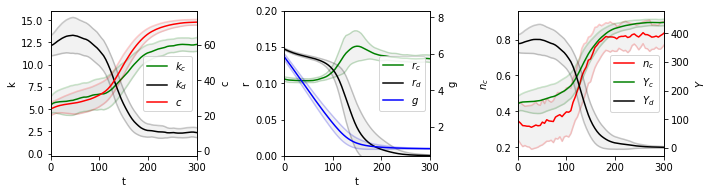

In [33]:
colors = ['g', 'k']
variables = ['$k_c$', '$k_d$']

fig = plt.figure(figsize=(10, 2.8))
ax = fig.add_subplot(131)

lns1 = plotfunc(variables, colors, data, ax)

axb = ax.twinx()

lns2 = plotfunc(['$c$'], ['r'], data, axb)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='center right')

ax2 = fig.add_subplot(132)

lns3 = plotfunc(variables=['$r_c$', '$r_d$'], 
                colors=['g', 'k'], data=data, ax=ax2)
ax2.set_ylim([0., 0.2])

ax2b = ax2.twinx()

lns4 = plotfunc(variables=['$g$'],
                colors=['b'], data=data, ax=ax2b)

lns = lns3+lns4
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='center right')

ax3 = fig.add_subplot(133)

lns5 = plotfunc(variables=['$n_c$'],
                colors=['r'], data=data, ax=ax3)

ax3b = ax3.twinx()

lns6 = plotfunc(variables=['$Y_c$', '$Y_d$'],
               colors=['g', 'k'], 
               data=data,
               ax=ax3b)

lns = lns5+lns6
labs = [l.get_label() for l in lns]
ax3.legend(lns, labs, loc='center right')

ax.set_ylabel('k')
axb.set_ylabel('c')
ax2.set_ylabel('r')
ax2b.set_ylabel('g')
ax2c.set_ylabel('n')
ax.set_xlabel('t')
ax2.set_xlabel('t')
ax3.set_ylabel('$n_c$')
ax3b.set_ylabel('$Y$')


plt.tight_layout()
fig.savefig('example_trajectory.pdf')

In [ ]:
d = data[0]
d['total_capital'] = (d['$k_c$'] + d['$k_d$'])

In [ ]:
d[['total_capital', '$k_c$', '$k_d$']]